# PREDICCIÓN DE CALIDAD MINERAL

## INTRODUCCIÓN

### El mineral de hierro es una sustancia mineral que, cuando se calienta en presencia de un reductor, produce hierro metálico (Fe). Casi siempre consiste en óxidos de hierro, cuyas formas primarias son magnetita (Fe3O4) y hematita (Fe2O3).
### El mineral de hierro es la fuente de hierro primario para las industrias siderúrgicas del mundo. Por lo tanto, es esencial para la producción de acero, que a su vez es esencial para mantener una base industrial fuerte. Casi todo el mineral de hierro (98%) se utiliza en la fabricación de acero. El mineral de hierro se extrae en unos 50 países. Los siete mayores productores representan alrededor de las tres cuartas partes de la producción mundial total. Australia y Brasil juntos dominan las exportaciones mundiales de mineral de hierro, cada uno con alrededor de un tercio de las exportaciones totales.
### Los minerales que se extraen de una planta de tratamiento son mayoritariamente una mezcla entre el propio mineral de valor que se busca explotar, y también material que no posee valor comercial, el cual se denomina “ganga”.
### Un paso principal en el procesamiento de minerales es la separación física del mineral con valor económico, de la ganga, para producir una porción enriquecida (concentrado) que contiene la mayoría de los minerales valiosos y un descarte (relave) que contiene predominantemente la ganga.
### Un paso clave en la separación de minerales es la flotación. El proceso de flotación consiste en triturar el mineral para liberar granos separados de varios minerales valiosos y componentes de ganga, triturar las partículas de mineral con agua y luego volver hidrofóbica selectivamente la superficie del mineral de interés. Luego se pasa una corriente de burbujas de aire a través de la pulpa; las burbujas se adhieren y levitan las partículas hidrófobas, que se acumulan en una capa de espuma que fluye sobre el vertedero de la celda de flotación.
### El concentrado de flotación se muestrea periódicamente para determinar su pureza (es decir, % de mineral valioso, % de ganga). Un porcentaje más alto de ganga en el concentrado no es deseable, ya que indica que la mayoría de los minerales valiosos se han ido al relave. La medición de la pureza generalmente se realiza en un laboratorio y puede llevar algún tiempo antes de que los ingenieros de procesos puedan realizar ajustes en función de los resultados. Una investigación oportuna de la pureza del concentrado es, por tanto, un aspecto fundamental para el control y optimización del proceso de flotación.
### El objetivo de este trabajo es predecir la ganga (% de contenido de sílice) en el concentrado de flotación. El pronóstico ayudará a los ingenieros de procesos a evaluar la pureza del concentrado de flotación y tomar acciones correctivas por adelantado, es decir sin tener que esperar a tener los resultados de laboratorio y así poder optimizar el proceso de extracción mineral.


## SOBRE EL DATASET

### CONTEXTO ANALITICO
    El dataset con el que se trabajará corresponde a información recopilada durante un proceso de flotación de minerales en una planta de concentración, que abarca el período desde el 01 de abril de 2017 al 30 de abril de 2017, correspondiente a una mina dedicada a la explotación de hierro.
    El archivo .csv utilizado fue extraído de la página kaggle.com.


### CONTEXTO COMERCIAL
    El objetivo principal es utilizar los datos expuestos en el dataset para predecir cuánta impureza hay en el concentrado de mineral correspondiente a una Mina de Hierro. Como esta impureza se mide cada hora, si podemos predecir cuánta sílice (impureza) hay en el concentrado de mineral, podemos ayudar a los ingenieros, brindándoles información temprana para tomar medidas. Por lo tanto, podrán tomar acciones correctivas con anticipación (reducir la impureza, si es el caso) y también ayudar al medio ambiente (reducir la cantidad de mineral que va a los relaves a medida que reduce la sílice en el concentrado de mineral).

##### Importación de librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
from scipy import stats
import statistics


#### El dataset se muestra a continuación:

In [3]:
pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/Mining.csv')

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,4/1/2017 0:00,"59,72","9,22","2195,31","523,283","395,785","945,255","171,765","1,763,797,421,322","1,846,194,580,978",...,"249,082","807,178","799,417","799,614","461,455","476,486","421,792","449,983","64,03","3,11"
1,4/1/2017 0:00,"59,72","9,22","2148,28","520,983","397,219","945,499","171,748","1,763,793,195,901","1,846,220,493,979",...,"250,292","810,002","791,179","800,324","471,731","472,107","460,954","453,981","64,03","3,11"
2,4/1/2017 0:00,"59,72","9,22","2101,25","523,682","398,73","945,742","171,731","1,763,788,970,481","184,624,640,698",...,"248,511","800,781","802,031","802,312","474,609","469,266","493,972","447,476","64,03","3,11"
3,4/1/2017 0:00,"59,72","9,22","2054,22","524,413","400,369","945,985","171,713","176,378,474,506","184,627,231,998",...,"248,16","796,182","798,411","796,923","457,443","462,444","481,218","452,986","64,03","3,11"
4,4/1/2017 0:00,"59,72","9,22","2043,43","525,272","402,293","946,229","171,696","1,763,780,519,639","1,846,298,232,981",...,"247,747","790,783","794,159","790,596","437,286","454,435","466,243","459,457","64,03","3,11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129594,4/30/2017 23:00,"54,2","18,26","48,957,368","2,422,614,461,538","398,311","101,911","15,203,346,667","299,927","299,988",...,"293,727","439,206","449,734","446,475","190,396","332,986","359,939","340,358","65,21","2,54"
129595,4/30/2017 23:00,"54,2","18,26","4,836,658","2,422,593,076,923","397,88","10,192","15,203,371,111","299,86","297,554",...,"294,742","448,714","438,329","439,674","217,672","331,445","372,107","344,662","65,21","2,54"
129596,4/30/2017 23:00,"54,2","18,26","47,775,792","2,422,571,692,308","401,788","10,193","15,203,395,556","299,433","302,028",...,"303,69","450,471","445,089","439,296","210,815","334,152","330,819","346,987","65,21","2,54"
129597,4/30/2017 23:00,"54,2","18,26","47,185,004","2,422,550,307,692","401,78","101,939","1,520,342","299,51","300,613",...,"305,29","452,461","448,459","443,815","201,431","349,177","337,431","346,388","65,21","2,54"


#### El dataset cuenta con:
24 columnas 
129599 filas.


### DESCRIPCIÓN DEL DATASET:
- date: fecha y hora de la medición, que abarca el período del 01 de abril de 2017 al 30 de abril de 2017. Algunas variables se muestrean cada 20 segundos, mientras que otras se muestrean cada 1 hora.
- % Iron Feed: Porcentaje de Hierro presente en el mineral de hierro, antes de ingresar a la planta de flotación.
- % Silica Feed: Porcentaje de sílice (considerado impureza) presente en el mineral de hierro, antes de ingresar a la planta de flotación.
- Starch Flow: Flujo de reactivo de almidón (m³/h).
- Amina Flow: Flujo de reactivo de amina (m³/h).
- Ore Pulp Flow: Flujo de pulpa mineral (t/h).
- Ore Pulp ph: pH de la pulpa mineral (0 a 14).
- Ore Pulp Density: Densidad de pulpa mineral (1 a 3 kg/cm³).
- Flotation Column 01 Air Flow: flujo de aire que va a la celda de flotación 01 (Nm³/h).
- Flotation Column 02 Air Flow: flujo de aire que va a la celda de flotación 02 (Nm³/h).
- Flotation Column 03 Air Flow: flujo de aire que va a la celda de flotación 03 (Nm³/h).
- Flotation Column 04 Air Flow: flujo de aire que va a la celda de flotación 04 (Nm³/h).
- Flotation Column 05 Air Flow: flujo de aire que va a la celda de flotación 05 (Nm³/h).
- Flotation Column 06 Air Flow: flujo de aire que va a la celda de flotación 06 (Nm³/h).
- Flotation Column 07 Air Flow: flujo de aire que va a la celda de flotación 07 (Nm³/h).
- Flotation Column 01 Level: Nivel de espuma en la celda de flotación 01 (mm).
- Flotation Column 02 Level: Nivel de espuma en la celda de flotación 02 (mm).
- Flotation Column 03 Level: Nivel de espuma en la celda de flotación 03 (mm).
- Flotation Column 04 Level: Nivel de espuma en la celda de flotación 04 (mm).
- Flotation Column 05 Level: Nivel de espuma en la celda de flotación 05 (mm).
- Flotation Column 06 Level: Nivel de espuma en la celda de flotación 06 (mm).
- Flotation Column 07 Level: Nivel de espuma en la celda de flotación 07 (mm).
- % Iron Concentrate: Porcentaje de Hierro presente en el mineral de hierro, luego del proceso de flotación (medición obtenida luego de análisis de laboratorio).
- % Silica Concentrate: Porcentaje de Sílice (impureza o ganga) presente en el mineral de hierro, luego del proceso de flotación (medición obtenida luego de análisis de laboratorio).


### EXPLORATORY DATA ANALYSIS (EDA)

#### Cada fila de datos consta de 23 mediciones que se pueden clasificar en cuatro tipos:

- materias primas (columna 2-3);
- variables de entorno (columna 4-8);
- variables de proceso (columna 9-22);
- materiales procesados (columna 23-24).

Las materias primas y los materiales procesados se tomaron muestras cada hora, mientras que los demás se tomaron muestras cada 20 segundos.

In [4]:
cols_renamed = [
    'date',          # Timestamp of measurements, formatted YYYY-MM-DD HH:MM:SS
    'feed_iron',     # %Iron (valuables) in the ore being fed into the flotation cell
    'feed_silica',   # %Silica (gangue) in the ore being fed into the cell
    'starch_flow',   # Amount of starch (reagent) added into the cell, measured in m^3/h
    'amina_flow',    # Amount of amina (reagent) added into the cell, measured in m^3/h
    'pulp_flow',     # Amount of ore pulp fed into the cell, measured in tonnes/hour
    'pulp_ph',       # Acidity/alkalinity of ore pulp on a scale of 0-14
    'pulp_density',  # Amount of ore in the pulp, between 1-3 kg/cm^3
    'air_col1',      # Volume of air injected into the cell, measured in Nm3/h
    'air_col2',
    'air_col3',
    'air_col4',
    'air_col5',
    'air_col6',
    'air_col7',
    'level_col1',    # Froth height in the cell, measured in mm
    'level_col2',
    'level_col3',
    'level_col4',
    'level_col5',
    'level_col6',
    'level_col7',
    'conc_iron',     # Lab measurement: %Iron in the end of flotation process
    'conc_silica']   # Lab measurement: %Silica in the end of flotation process

In [8]:
df = pd.read_csv(
    '/workspaces/CoderHouse_CH-32845/data/raw/Mining.csv', 
    header=0, 
    names=cols_renamed, 
    parse_dates=['date'], 
    infer_datetime_format=True, 
    decimal=',')
df.head()

,date,feed_iron,feed_silica,starch_flow,amina_flow,pulp_flow,pulp_ph,pulp_density,air_col1,air_col2,...,air_col7,level_col1,level_col2,level_col3,level_col4,level_col5,level_col6,level_col7,conc_iron,conc_silica
0,2017-04-01,59.72,9.22,"2195,31","523,283","395,785","945,255","171,765","1,763,797,421,322","1,846,194,580,978",...,249.082,"807,178","799,417","799,614","461,455","476,486","421,792","449,983","64,03","3,11"
1,2017-04-01,59.72,9.22,"2148,28","520,983","397,219","945,499","171,748","1,763,793,195,901","1,846,220,493,979",...,250.292,"810,002","791,179","800,324","471,731","472,107","460,954","453,981","64,03","3,11"
2,2017-04-01,59.72,9.22,"2101,25","523,682","398,73","945,742","171,731","1,763,788,970,481","184,624,640,698",...,248.511,"800,781","802,031","802,312","474,609","469,266","493,972","447,476","64,03","3,11"
3,2017-04-01,59.72,9.22,"2054,22","524,413","400,369","945,985","171,713","176,378,474,506","184,627,231,998",...,248.16,"796,182","798,411","796,923","457,443","462,444","481,218","452,986","64,03","3,11"
4,2017-04-01,59.72,9.22,"2043,43","525,272","402,293","946,229","171,696","1,763,780,519,639","1,846,298,232,981",...,247.747,"790,783","794,159","790,596","437,286","454,435","466,243","459,457","64,03","3,11"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129599 entries, 0 to 129598
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          129599 non-null  datetime64[ns]
 1   feed_iron     129599 non-null  float64       
 2   feed_silica   129599 non-null  float64       
 3   starch_flow   129599 non-null  object        
 4   amina_flow    129599 non-null  object        
 5   pulp_flow     129599 non-null  object        
 6   pulp_ph       129599 non-null  object        
 7   pulp_density  129599 non-null  object        
 8   air_col1      129599 non-null  object        
 9   air_col2      129599 non-null  object        
 10  air_col3      129599 non-null  object        
 11  air_col4      129599 non-null  object        
 12  air_col5      129599 non-null  object        
 13  air_col6      129599 non-null  object        
 14  air_col7      129599 non-null  object        
 15  level_col1    129

In [10]:
df = df.set_index('date').resample('H').first()
df.shape

(720, 23)

In [11]:
nans = df[df.isna().any(axis=1)]  # Check for missing values
print(f'Filas totales con NaNs: {nans.shape[0]}\n')
nans

Filas totales con NaNs: 0



,feed_iron,feed_silica,starch_flow,amina_flow,pulp_flow,pulp_ph,pulp_density,air_col1,air_col2,air_col3,...,air_col7,level_col1,level_col2,level_col3,level_col4,level_col5,level_col6,level_col7,conc_iron,conc_silica
date,,,,,,,,,,,,,,,,,,,,,


In [13]:
df = df['2017-03-29 12:00:00':]
df

,feed_iron,feed_silica,starch_flow,amina_flow,pulp_flow,pulp_ph,pulp_density,air_col1,air_col2,air_col3,...,air_col7,level_col1,level_col2,level_col3,level_col4,level_col5,level_col6,level_col7,conc_iron,conc_silica
date,,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00,59.72,9.22,"2195,31","523,283","395,785","945,255","171,765","1,763,797,421,322","1,846,194,580,978","1,842,928,185,841",...,249.082,"807,178","799,417","799,614","461,455","476,486","421,792","449,983","64,03","3,11"
2017-04-01 01:00:00,59.72,9.22,"2617,37","570,068","400,804","977,697","177,823","1,763,036,845,572","1,850,858,921,111","1,848,179,070,796",...,254.226,"809,62","795,589","806,463","454,829","385,631","459,992","348,102","64,03","3,11"
2017-04-01 02:00:00,59.72,9.22,"2186,34","568,324","402,207","973,384","177,124","1,762,276,269,822","1,855,523,261,244","1,853,429,955,752",...,247.247,"818,543","809,72","810,324","435,042","445,597","450,361","436,695","64,03","3,11"
2017-04-01 03:00:00,59.72,9.22,"2242,55","568,68","396,989","945,394","176,924","1,761,515,694,072","1,860,187,601,376","1,858,680,840,708",...,246.743,"789,233","801,725","810,663","447,409","453,025","463,98","473,054","64,03","3,11"
2017-04-01 04:00:00,59.72,9.22,"3167,87","563,812","395,328","931,481","176,492","1,760,755,118,322","1,864,851,941,509","1,863,931,725,664",...,253.0,"793,672","796,599","799,872","441,557","452,429","465,472","457,044","64,03","3,11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-30 19:00:00,54.20,18.26,"3,380,295,210,526","368,096","402,118","979,862","15,199,329,412","300,888","304,569","299,31",...,"297,832","451,478","456,26","465,969","371,217","364,009","317,096","338,667","65,49","1,99"
2017-04-30 20:00:00,54.20,18.26,"2273,18","535,485","397,481","990,858","172,241","299,649","302,282","299,268",...,"331,338","476,595","444,801","435,957","423,215","360,135","301,275","348,587","65,65","1,83"
2017-04-30 21:00:00,54.20,18.26,"2293,27","560,171","401,287","985,019","179,079","300,27","301,98","300,675",...,"300,063","454,286","444,784","447,814","391,967","351,617","330,427","348,3","64,73","2,76"


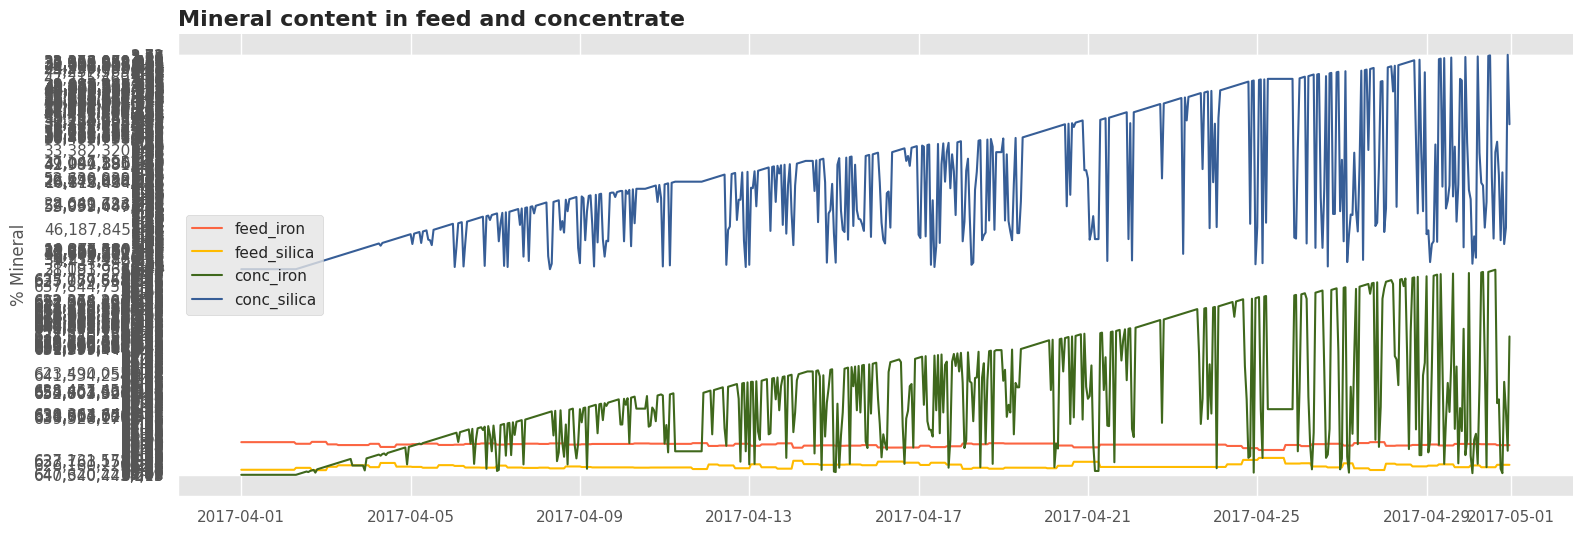

In [14]:
content = ['feed_iron', 'feed_silica', 'conc_iron', 'conc_silica']
palette = ['#FB6542', '#FFBB00', '#3F681C', '#375E97']

# Plot mineral content before and after flotation
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18,6))
for pct, color in zip(content, palette):
    ax.plot(df.index.values, pct, data=df, color=color)
ax.set_title('Mineral content in feed and concentrate',
             loc='left', weight='bold', size=16)
ax.set_ylabel('% Mineral')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='center left')
plt.show()